# IRIS-Flower-clustering

[Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)
Этот проект представляет собой применение машинного обучения с программированием на Python на примере кластеризации цветов IRIS с использованием машинного обучения с инструментами scikit.

В качестве задания вам предлагается повторить данные действия по визуализации и кластеризации для наборов данных (можно выбрать, что больше понравится, но лучше сделать для всех)
- [User Knowledge Modeling Data Set](http://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)
- [Blood Transfusion Service Center Data Set](http://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)
- [Somerville Happiness Survey Data Set](http://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey)
- [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality)



In [1]:
# Подключаем библиотеки
import pandas as pd # Работа с набором данных
import numpy as np # Линейная алгебра
# Визуализация данных
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# отключение информационных сообщений
from warnings import filterwarnings
filterwarnings(action='ignore')

# разделение выборки
from sklearn.model_selection import train_test_split

#Метод K-средних
from sklearn.cluster import KMeans

from sklearn import metrics

In [2]:
# читаем данные
url = 'https://raw.githubusercontent.com/AnnaA102/mo2025/refs/heads/main/semestr/Modeling_dataset.csv'
data = pd.read_csv(url)
#Выделим только значения параметров для кластеризации
X=data.iloc[:, [0, 1, 2, 3]].values

# Метод k-средних

Метод K-средних (Алгоритм Ллойда)
Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем объекты снова разбиваются на кластеры в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике. Алгоритм завершается, когда на какой-то итерации не происходит изменения внутрикластерного расстояния.

Метод k-средних пытается сгруппировать похожие элементы в три этапа:

1. Выберем значение k
2. Инициализируем центроиды (разделительные линии)
3. Выберем группу и найдем среднее значение расстояния между точками.

Этот процесс будет продолжаться до тех пор, пока мы не переберем все возможные сочетания пар точек и не уточним границы кластеров. Стабильность центроидов определяется путем сравнения абсолютного значения изменения среднего Евклидова расстояния (Euclidian Distance) между наблюдениями и их соответствующими центроидами с пороговым значением.

Одна из самых сложных задач в этом алгоритме кластеризации – выбрать правильные значения k. Существует два метода.

**Метод локтя** (Elbow Rule) – один из самых известных методов, с помощью которого вы можете выбрать правильное значение k и повысить производительность Модели (Model). Этот эмпирический метод вычисляет сумму квадратов расстояний между точками и вычисляет Среднее значение (Mean).

Когда значение k равно 1, сумма квадрата внутри кластера будет большой. По мере увеличения значения k сумма квадратов расстояний внутри кластера будет уменьшаться.

**Метод силуэта**
Метод силуэта (Silhouette Method) вычисляет среднее расстояние между точками в своем кластере $a_i$ и среднее расстояние от точек до следующего ближайшего кластера, называемого $b_i$.

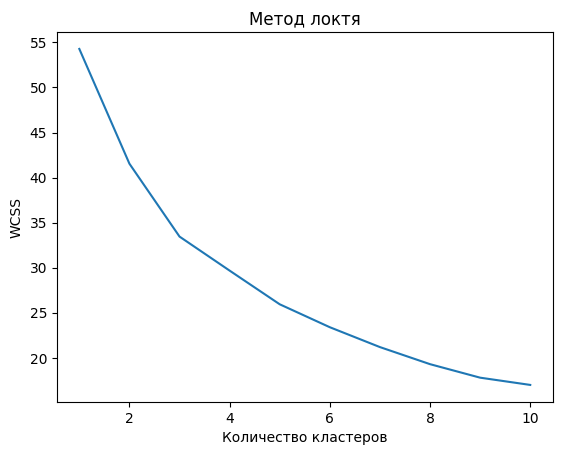

In [3]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Нарисуем график зависимости среднего расстояния от количества кластеров используя метод локтя.
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS') # Сумма квадратов расстояний
plt.show()

Собственно оптимальное значение будет там, где возникает "локоть", т.е. в нашем случае k=3.

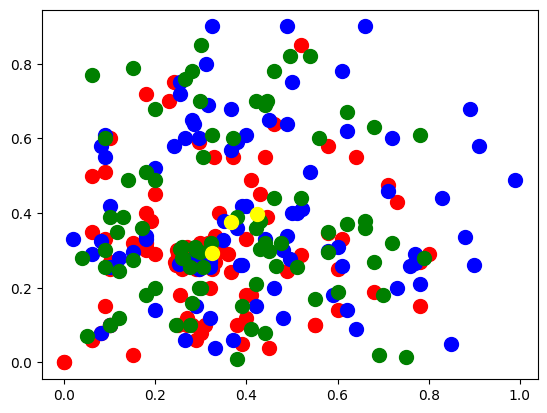

In [4]:
# Применим кластеризацию
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Отобразим кластеры

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
# Отобразим центроиды
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')
